In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load results
kmeans_results = []
for file in os.listdir("logs_clustering"):
    if file.endswith(".csv") and file.startswith("kmeans"):
        kmeans_results.append(pd.read_csv(f"logs_clustering/{file}"))

kmeans_results = pd.concat(kmeans_results)

dbscan_results = []
for file in os.listdir("logs_clustering"):
    if file.endswith(".csv") and file.startswith("dbscan"):
        dbscan_results.append(pd.read_csv(f"logs_clustering/{file}"))

dbscan_results = pd.concat(dbscan_results)

In [6]:
# Plot the results


def plot_results(results, title):
    # Set the style of seaborn
    sns.set_theme(style="whitegrid")

    # Create a line plot for the results
    plt.figure(figsize=(12, 6))

    # Split the results by version
    results_sega = results[results["version"] == "sega_learn"]
    results_sega_pypy = results[results["version"] == "sega_learn_pypy"]
    results_sklearn = results[results["version"] == "sklearn"]

    # Plot mean times
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sega,
        label="sega_learn",
        color="blue",
    )
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sega_pypy,
        label="sega_learn_pypy",
        color="orange",
    )
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sklearn,
        label="sklearn",
        color="green",
    )

    # Fill standard deviation areas
    plt.fill_between(
        results_sega["sample_size"],
        results_sega["avg_time"] - results_sega["std_time"],
        results_sega["avg_time"] + results_sega["std_time"],
        alpha=0.3,
        color="blue",
    )

    plt.fill_between(
        results_sega_pypy["sample_size"],
        results_sega_pypy["avg_time"] - results_sega_pypy["std_time"],
        results_sega_pypy["avg_time"] + results_sega_pypy["std_time"],
        alpha=0.3,
        color="orange",
    )

    plt.fill_between(
        results_sklearn["sample_size"],
        results_sklearn["avg_time"] - results_sklearn["std_time"],
        results_sklearn["avg_time"] + results_sklearn["std_time"],
        alpha=0.3,
        color="green",
    )

    plt.xscale("log")
    plt.title(title)
    plt.xlabel("Sample Size (log scale)")
    plt.ylabel("Time (s)")
    plt.legend(title="Legend", title_fontproperties={"weight": "bold"})
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"plots/clustering_{title.replace(' ', '_')}.png")
    plt.show()

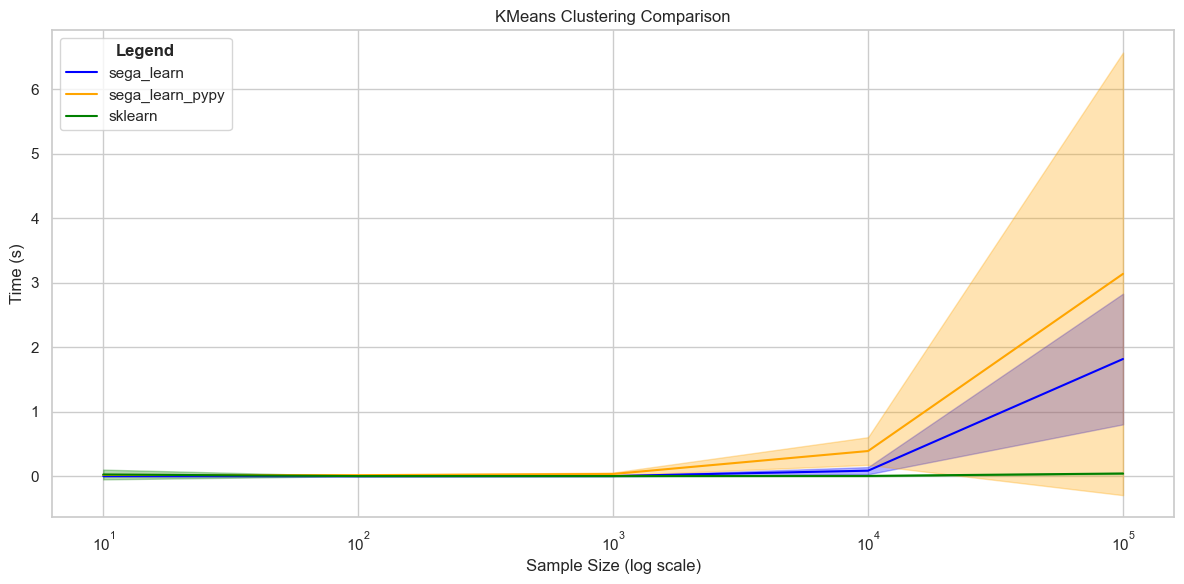

In [7]:
plot_results(kmeans_results, "KMeans Clustering Comparison")

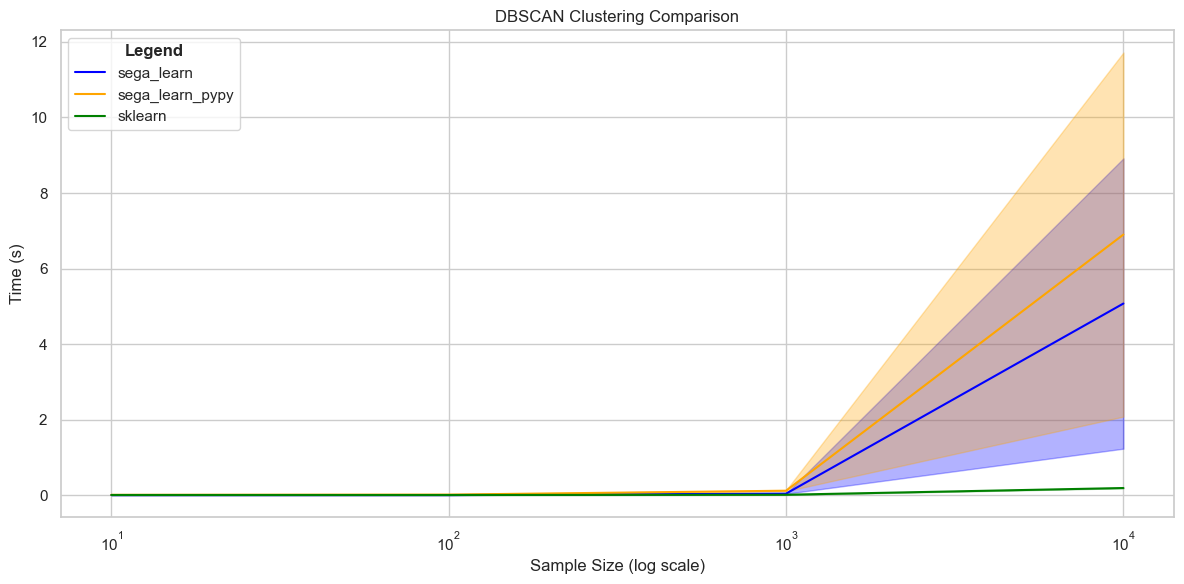

In [5]:
plot_results(dbscan_results, "DBSCAN Clustering Comparison")